In [1]:
#Here we do PCA for the unique words in the graph 
#and if they actually form some groups which means that they do serve as good features for our graph

import json
import random
import numpy as np
from collections import Counter
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import scipy
from gensim.models.word2vec import Word2Vec
from gensim.models.word2vec import Word2Vec
from sklearn.decomposition import PCA

In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/Shareddrives/Datathon\ 2022\ -\ RichB\ Fan\ Club/Data/Training

Mounted at /content/drive
/content/drive/Shareddrives/Datathon 2022 - RichB Fan Club/Data/Training


In [ ]:
#loading data
isolated_nodes = pd.read_csv("isolated_nodes.csv")
node_classification = pd.read_csv("node_classification.csv")      #there are 4 unique page types
training_graph = pd.read_csv("training_graph.csv")
with open('node_features_text.json') as f:
   node_features_text = json.load(f)
print(node_features_text.values())
listlist = []
for thing in node_features_text.values():
  listlist.append([str(i) for i in thing])
word_2_vec_test = Word2Vec(listlist, min_count=1)
print(word_2_vec_test)
wv = word_2_vec_test.wv

In [9]:
#Make a list of unique words with lables from 0 up to number of unique words - 1 so that each gets a unique number
vocabulary_size = 4714
word_list_str = [str(x) for x in range(vocabulary_size)]

#Do PCA
w2v_dm = np.array([list(word_2_vec_test.wv[x]) for x in word_list_str])
pca_w2v = PCA(n_components = 2).fit_transform(w2v_dm)

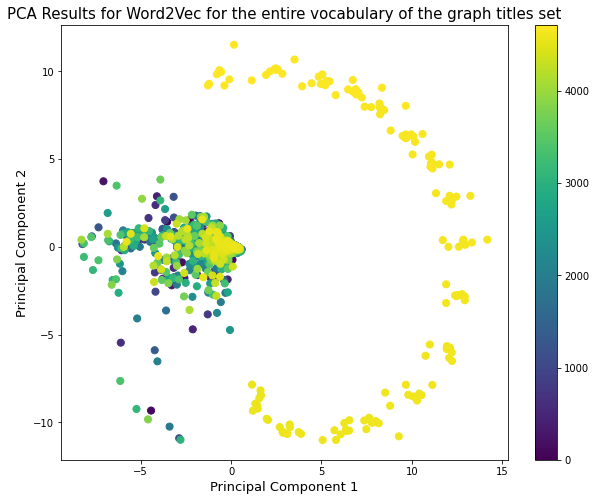

In [12]:
#Plot PCA

fig, ax = plt.subplots(figsize = (10, 8))
plt.scatter(x = pca_w2v[:, 0], y = pca_w2v[:, 1], s = 50, c = np.arange(4714), 
            cmap='viridis')
plt.title('PCA Results for Word2Vec for the entire vocabulary of the graph titles set', fontsize = 15)
plt.xlabel('Principal Component 1', fontsize = 13)
plt.ylabel('Principal Component 2', fontsize = 13)
plt.colorbar()
plt.show()